# Exploratory Data Anlaysis



## Goal 
1) Find out average salary of data job in Uk as of 2024.
2) Combine to use excel, sql, python to explore.
3) Job-seekers can use these infights to help find job opportunities.

## Questions to Answer:
    1) Salary by Job title
    2) Salary by Industry
    3) Salary by Employee size
    4) Salary by Company Revenue

    ### Narrow down for 7 most posted data job:
        - Most required skills
        - Required skills and salary
        - Company Rating vs Salary by job title

    ### How about Data Analyst job only?
        - Required skills and salary
        - Job posting count and Salary by Industry as DA


#### Import libraries and data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter, FuncFormatter

df_original = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\6_UK_Job_glassdoor2024\job_list_cleaned.csv')

sns.set_style('ticks')

# Remove data that dont contain salary
df = df_original.dropna(subset='salary').copy()



#### Adjust hourly salary to yearly 

In [4]:
# To find out if there is hourly salary
df[df['salary']<10000]['salary'].unique()

array([24. , 12.5, 60. , 17. ])

In [5]:
# Make hourly salary to yearly salary (1950 hours per year)

def make_year(salary):
    if salary<1000:    return salary*1950
    else : return salary

df['salary']=df['salary'].apply(make_year)  


 #### 1) Salary by Job title
         Groups DataFrame by `cleaned_job_title` and look up average salary. As visualization, I plot bar horizontal chart.

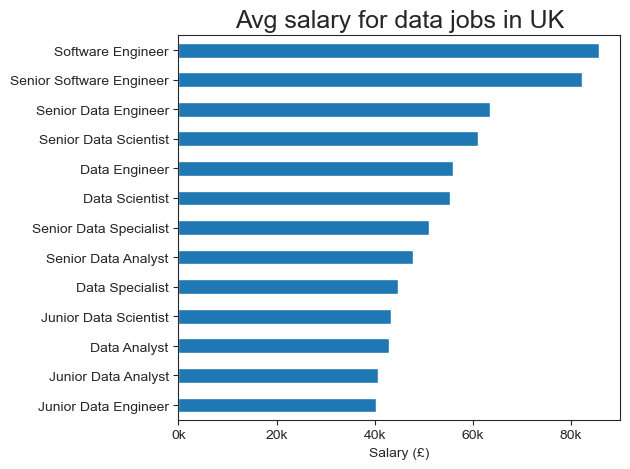

In [15]:
df.groupby('cleaned_job_title')['salary'].mean().sort_values().plot(kind='barh')

plt.title('Avg salary for data jobs in UK',fontsize=18)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.xlabel('Salary (£)')
plt.ylabel('')
plt.legend().remove()
plt.tight_layout()
plt.show()



#### 2) Salary by Industry
        To see average salary by industry, I grouped DataFrame by industry which has more than 20 rows of data for credible analysis. 

In [7]:
# avg salary by industry (more than 20 sample data for meaningful analysis)

df_ind_sal = df.groupby('industry').agg(
    industry_count = ('industry','count'),
    avg_salary = ('salary','mean')

).sort_values(by='industry_count',ascending=False).head(12)

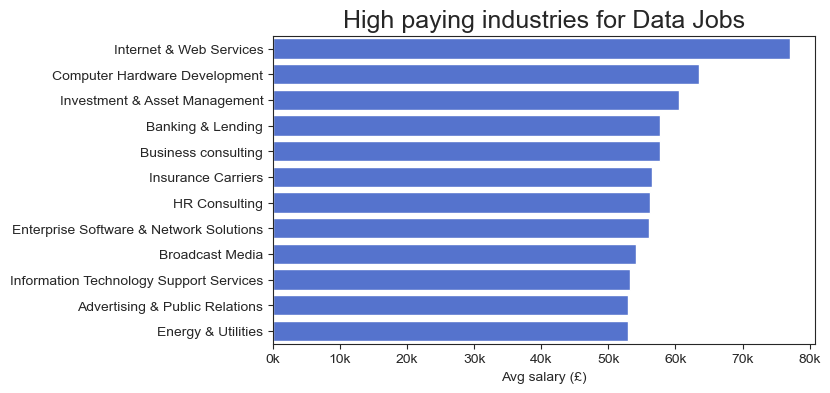

In [9]:
plt.figure(figsize=(7, 4))
sns.barplot(data=df_ind_sal.sort_values(by='avg_salary'), x='avg_salary', y='industry',color='royalblue')

plt.ylabel('')
plt.title("High paying industries for Data Jobs",fontsize=18)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.xlabel('Avg salary (£)')
plt.gca().invert_yaxis()
plt.show()


#### 3) Salary by Employee size
        Grouped DataFrame by `employee_size` and sorted by numeric order `emp_order` for better visualization.


In [10]:
emp_order = ['1 to 50 ' ,'51 to 200 ', '201 to 500 ', '501 to 1000 ', '1001 to 5000 ','5001 to 10000 ','10000+ ']

Text(0, 0.5, 'Employee number')

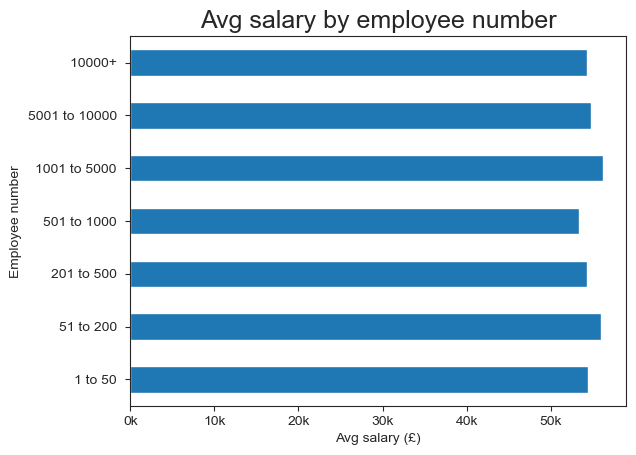

In [11]:
df_emp= df.groupby('employee_size')['salary'].mean().sort_values(ascending=False)

df_emp.reindex(emp_order).plot(kind='barh')
plt.title("Avg salary by employee number",fontsize=18)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.xlabel('Avg salary (£)')
plt.ylabel('Employee number')


- There is not much difference of average salay by employee number

#### 4) Salary by Company Revenue
        To understand if company revenue affects to salary. 

In [13]:
rev_order= ['Less than 1 M ','1 to 5 M ','5 to 25 M ', '25 to 50 M ' , '100 to 500 M ', '500 M to 1 B ', '2 to 5 B ', '5 to 10 B ','10+ B '   ]

Text(0, 0.5, 'Revenue')

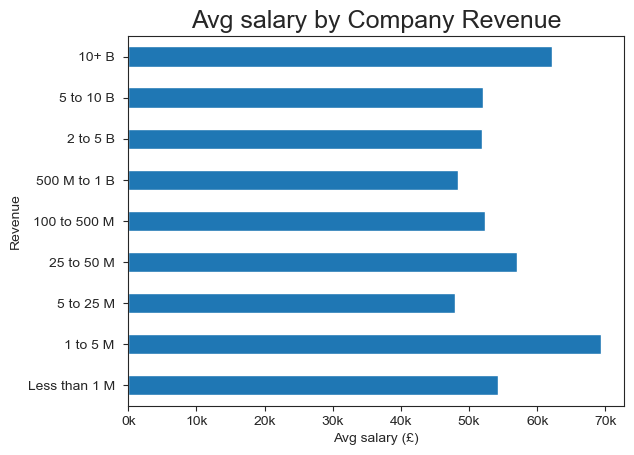

In [14]:
df_rev= df.groupby('revenue')['salary'].mean().sort_values(ascending=False)
df_rev.reindex(rev_order).plot(kind='barh')
plt.title("Avg salary by Company Revenue",fontsize=18)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.xlabel('Avg salary (£)')
plt.ylabel('Revenue')


- 1M to 5M revenue companys are most paying salary but overall there are not much of differences.